In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import io
import os
from sklearn import metrics


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
#flattening the shape
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)
display(x_train_flatten.shape)
display(x_test_flatten.shape)

(60000, 784)

(10000, 784)

In [6]:
model = Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam", 
    metrics=["accuracy"]
)
model.fit(x_train_flatten,  y_train, verbose=2, epochs=10)


Epoch 1/10
1875/1875 - 7s - loss: 0.4759 - accuracy: 0.8752 - 7s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.3041 - accuracy: 0.9154 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 5s - loss: 0.2829 - accuracy: 0.9209 - 5s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.2731 - accuracy: 0.9234 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.2668 - accuracy: 0.9255 - 5s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.2618 - accuracy: 0.9274 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.2583 - accuracy: 0.9286 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.2554 - accuracy: 0.9293 - 5s/epoch - 3ms/step
Epoch 9/10
1875/1875 - 5s - loss: 0.2530 - accuracy: 0.9298 - 5s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 6s - loss: 0.2508 - accuracy: 0.9308 - 6s/epoch - 3ms/step


In [7]:
model.evaluate(x_train_flatten,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.2458 - accuracy: 0.9329


[0.2457965761423111, 0.9328500032424927]

In [9]:
np.set_printoptions(suppress=True)
pred = model.predict(x_test_flatten)
pred

313/313 [==============================] - 1s 2ms/step


array([[0.00394342, 0.00000001, 0.02679282, ..., 0.9998316 , 0.09002694,
        0.65526265],
       [0.18281715, 0.00448643, 0.99984914, ..., 0.        , 0.10285953,
        0.        ],
       [0.0001146 , 0.9927474 , 0.72598577, ..., 0.04965056, 0.33636725,
        0.03378732],
       ...,
       [0.00000116, 0.00000043, 0.00152487, ..., 0.18417221, 0.5977263 ,
        0.76407295],
       [0.00001727, 0.00002653, 0.0000531 , ..., 0.00002168, 0.6529271 ,
        0.00001851],
       [0.00144723, 0.        , 0.38477963, ..., 0.        , 0.00006217,
        0.00000001]], dtype=float32)

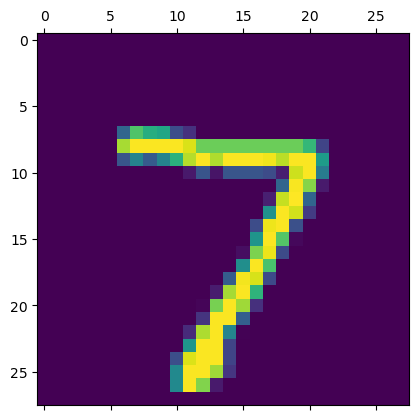

In [20]:
import matplotlib.pyplot as plt
plt.matshow(x_test[0])

In [21]:
pred[0]

array([0.00394342, 0.00000001, 0.02679282, 0.97351813, 0.0016556 ,
       0.13771816, 0.00000004, 0.9998316 , 0.09002694, 0.65526265],
      dtype=float32)

In [22]:
np.argmax(pred[0])

7